### 4. Analytical context (Data extraction)
I found only one [CKD dataset][1] with some features that could give us some relevant information about CKD. The dimensions of the source are 26 attributes and 400 observations. The attributes are predominantly blood test indicators, with other biometric data. Therefore, as we have a small sample of data, we have to manage carefully.

[1]: https://raw.githubusercontent.com/dphi-official/Datasets/master/Chronic%20Kidney%20Disease%20(CKD)%20Dataset/ChronicKidneyDisease.csv

In [1]:
# Import every library to be use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
url = "https://raw.githubusercontent.com/dphi-official/Datasets/master/Chronic%20Kidney%20Disease%20(CKD)%20Dataset/ChronicKidneyDisease.csv"
ckd_df = pd.read_csv(url, index_col=False)
# As well as ID is the same numbering, It is changed the id column to 'index'.
ckd_df.set_index('id', inplace=True)
ckd_df.info()
ckd_df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
# rename features (more descriptive)
columns_description = ['age','blood pressure','specific gravity','albumin','sugar',
       'red blood cells','pus cell','pus cell clumps','bacteria',
       'blood glucose random','blood urea','serum creatinine',
       'sodium','potassium','hemoglobin','packed cell volume',
       'white blood cell count','red blood cell count','hypertension',
       'diabetes mellitus','coronary artery disease','appetite','pedal edema','anemia','classification']
ckd_df.columns = columns_description
ckd_df.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


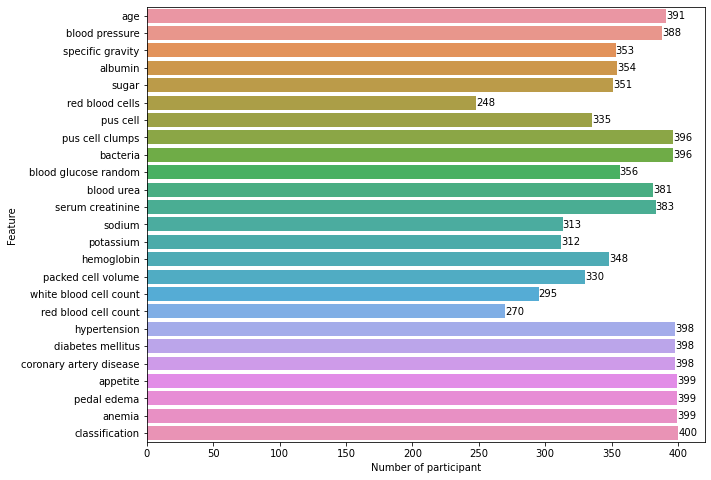

In [4]:
# Plot count of participant without NaN
def plot_count_by_feature(data_df):
    tmp_df = pd.DataFrame(data_df.count()).set_axis(['Number of participant'], axis=1)
    tmp_df.reset_index(inplace=True)
    tmp_df.rename(columns = {'index':'Feature'}, inplace = True)
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = sns.barplot(x='Number of participant', y='Feature', data=tmp_df)
    for container in ax.containers:
        ax.bar_label(container, fmt='%d')
plot_count_by_feature(ckd_df)

Looking at this figure, we can verify quickly which feature has NaN. It means that there are participants with less data than others. Thus, in the next section we are going to try to fix this issue.

Counting nan or unrecognized values:
age                          9
blood pressure              12
specific gravity            47
albumin                     46
sugar                       49
red blood cells            152
pus cell                    65
pus cell clumps              4
bacteria                     4
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed cell volume          70
white blood cell count     105
red blood cell count       130
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
classification               0
dtype: int64


c:\Users\ANA\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


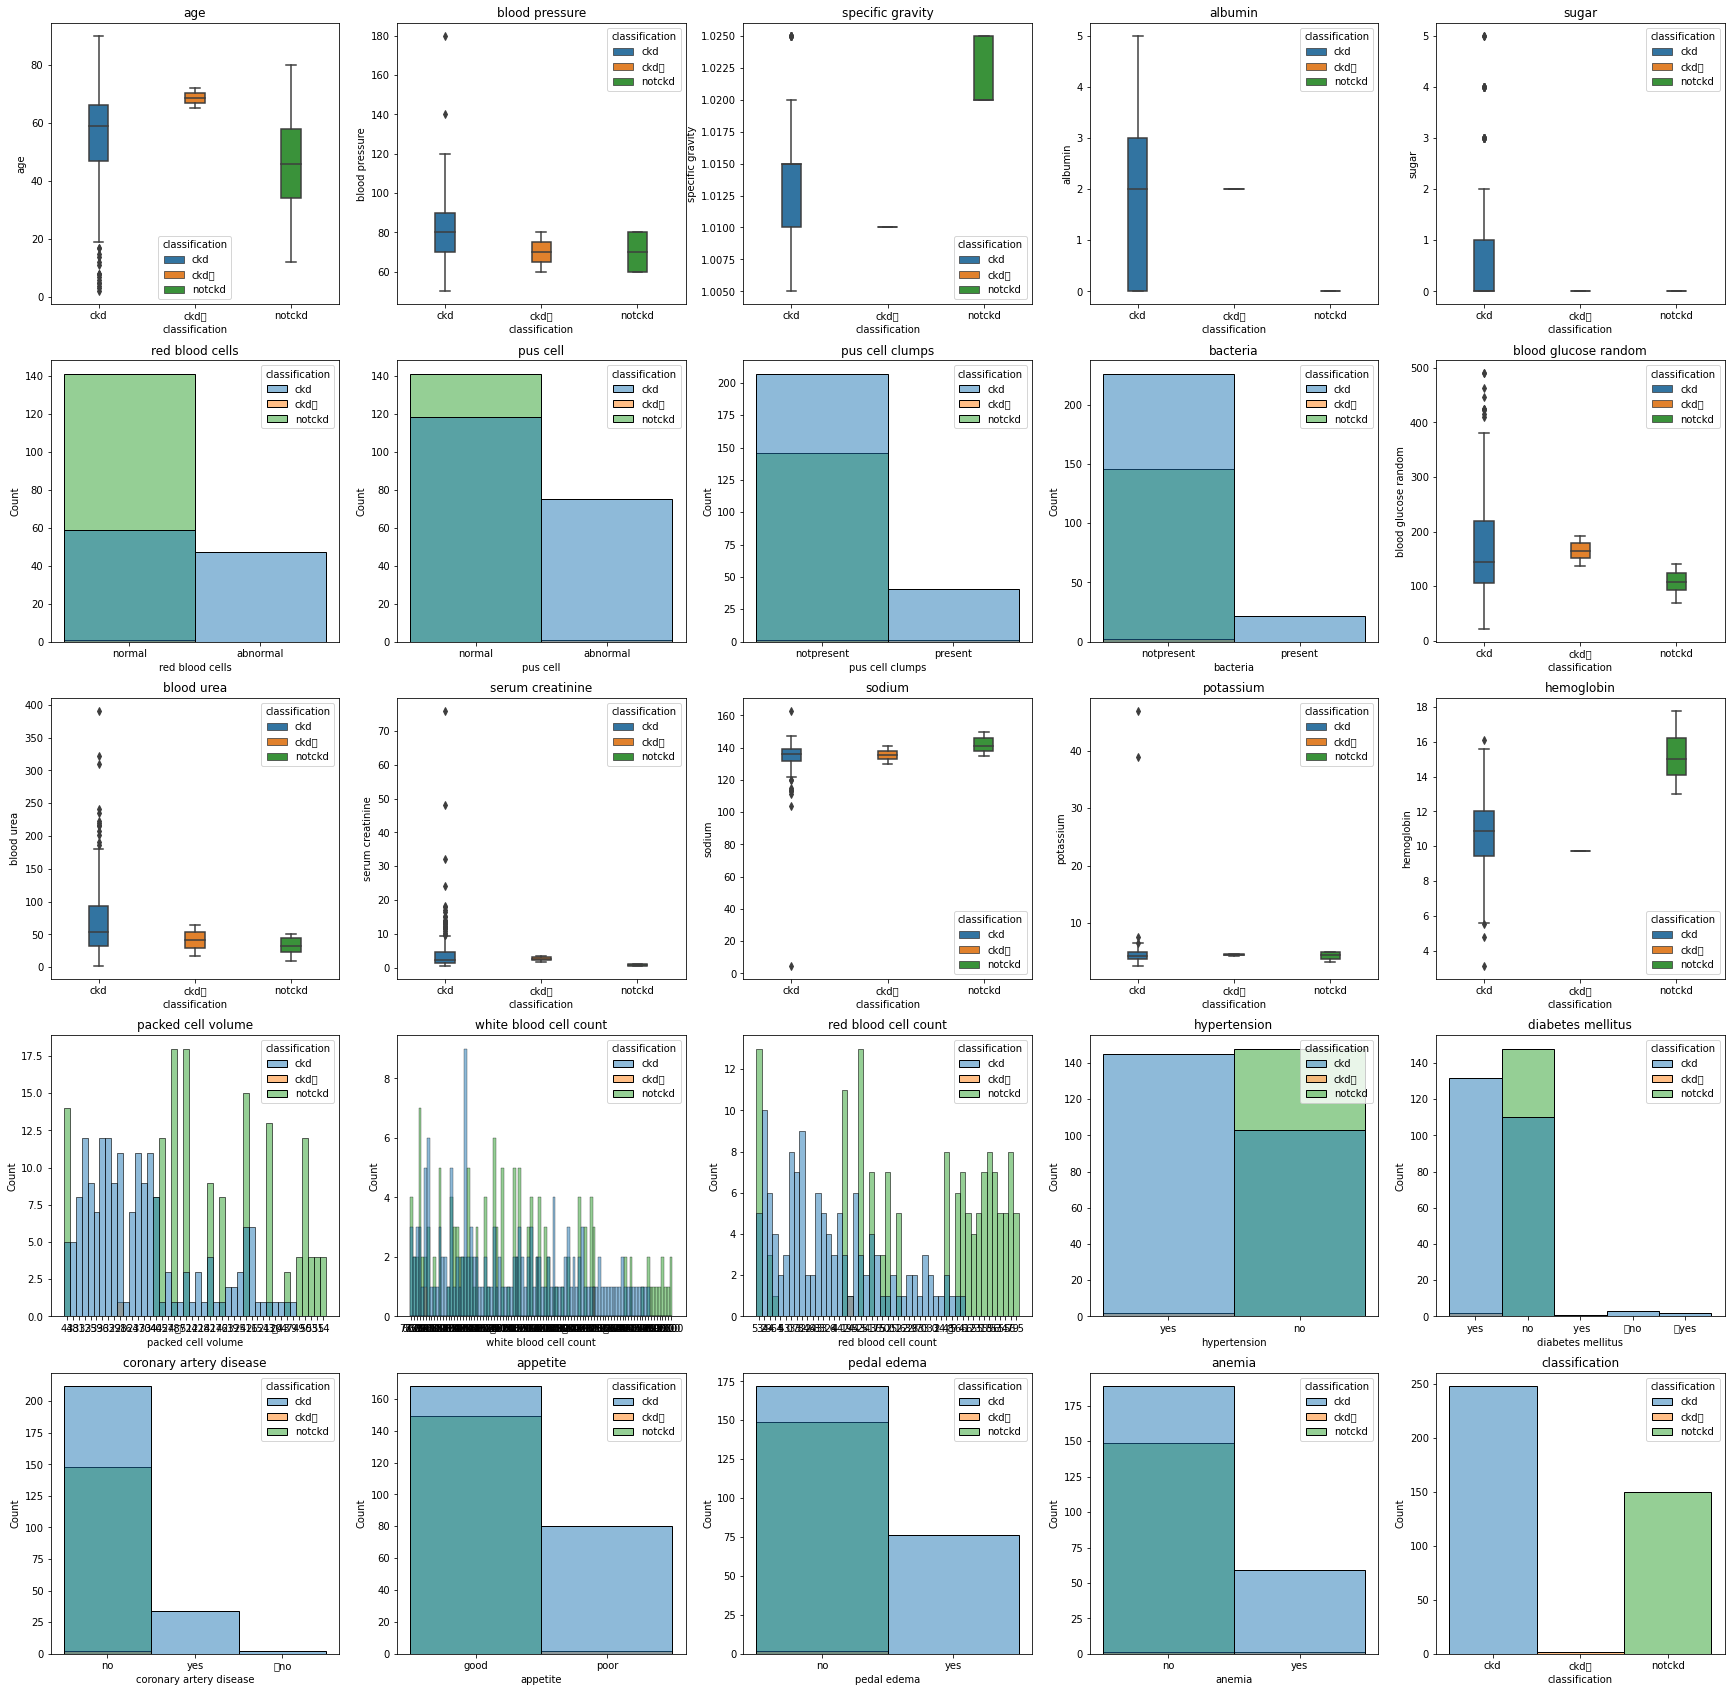

In [5]:
def plot_class_by_all(ckd_df, n_plot_columns, n_plot_rows):
    fig, axs = plt.subplots(n_plot_rows, n_plot_columns, figsize=(30, 30))
    i_row    = 0
    i_column = 0
    for i in ckd_df.columns:
        # print()
        # # print(i_row,i_column)
        if ckd_df[i].dtype != object:
            sns.boxplot(x='classification',y=i, hue = 'classification', data=ckd_df, width=0.2, dodge=False, ax=axs[i_row,i_column])
            axs[i_row,i_column].set_title(i)
        else:
            axs[i_row,i_column].set_title(i)
            sns.histplot(data=ckd_df, x=i, hue="classification", ax=axs[i_row,i_column])
            # axs[i_row,i_column].tick_params(axis='x', rotation=90)
        if i_column < n_plot_columns-1: 
            i_column += 1
        elif i_column == n_plot_columns-1:
            i_column = 0
            if i_row < n_plot_rows:
                i_row += 1

print("Counting nan or unrecognized values:")
print(ckd_df.isnull().sum())

n_plot_columns = 5
n_plot_rows    = math.ceil(ckd_df.shape[1]/n_plot_columns)
plot_class_by_all(ckd_df, n_plot_columns, n_plot_rows)

It is possible to observe that there is some data needed to preprocess, clean, integrate, etc. Hence, we are going to explore our date and adapt it as well as workable. For example, there are features that have number values but are assigned as string objects. Also, there are string objects with the same name, however it has other letters (like square).

### 5. Data Exploration (EDA)
We saw in the last section, when extracted data information, there was some data that they needed to explore as well as possible to work on the algorithm model selection. Hence, now, we are going to do following job:

- Data preprocessing
- Data cleaning 
- Data integration 
- Data transformation 
- Data reduction 
- Data discretization 

In [6]:
ckd_eda_df = ckd_df
# Convert variables to the appropriate type
ckd_eda_df['red blood cell count'] = pd.to_numeric(ckd_eda_df['red blood cell count'], errors='coerce')
ckd_eda_df['white blood cell count'] = pd.to_numeric(ckd_eda_df['white blood cell count'], errors='coerce')
ckd_eda_df['packed cell volume'] = pd.to_numeric(ckd_eda_df['packed cell volume'], errors='coerce')

# Group categorical variables together in a list
cat_var = [var for var in ckd_eda_df.columns if ckd_eda_df[var].dtype == 'object']
num_var = [var for var in ckd_eda_df.columns if ckd_eda_df[var].dtype == 'float64']

# Use for loop to assess unique values and identify typos
for var in cat_var:
    print(f"{var} contains the following unique values: {ckd_eda_df[var].unique()}")


red blood cells contains the following unique values: [nan 'normal' 'abnormal']
pus cell contains the following unique values: ['normal' 'abnormal' nan]
pus cell clumps contains the following unique values: ['notpresent' 'present' nan]
bacteria contains the following unique values: ['notpresent' 'present' nan]
hypertension contains the following unique values: ['yes' 'no' nan]
diabetes mellitus contains the following unique values: ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary artery disease contains the following unique values: ['no' 'yes' '\tno' nan]
appetite contains the following unique values: ['good' 'poor' nan]
pedal edema contains the following unique values: ['no' 'yes' nan]
anemia contains the following unique values: ['no' 'yes' nan]
classification contains the following unique values: ['ckd' 'ckd\t' 'notckd']


In [7]:
type(ckd_eda_df)

pandas.core.frame.DataFrame

In [8]:
# Fix errors in 'diabetes_mellitus'
ckd_eda_df['diabetes mellitus'] = ckd_eda_df['diabetes mellitus'].str.strip()
ckd_eda_df['diabetes mellitus'].replace({'/tno','/tyes'}, {'no','yes'}, inplace = True)
ckd_eda_df['diabetes mellitus'].value_counts()

# Fix errors in 'coronary_artery_disease'
ckd_eda_df['coronary artery disease'].replace('\tno', 'no', inplace = True)
ckd_eda_df['coronary artery disease'].value_counts()

# Fix errors in 'classification'
ckd_eda_df['classification'].replace('ckd_df\t', 'ckd_df', inplace = True)
ckd_eda_df['classification'].value_counts()

def impute_randomsample(variable):
    randomsample = pd.DataFrame()
    if ckd_eda_df[variable].dtype == 'float64':
        Q1  = ckd_eda_df[variable].dropna().quantile(0.25)
        Q3  = ckd_eda_df[variable].dropna().quantile(0.75) if Q1 > 0 else ckd_eda_df[variable].dropna().quantile(1)
        IQR = Q3 - Q1
        ckd_iqr_df   = ckd_eda_df[(Q1 - 1.5*IQR) < ckd_eda_df[variable]]
        ckd_iqr_df   = ckd_iqr_df[                 ckd_iqr_df[variable] < (Q3 + 1.5*IQR)]
        randomsample = ckd_iqr_df[variable].sample(ckd_eda_df[variable].isna().sum())
        # randomsample.index = ckd_eda_df[ckd_eda_df[variable].isnull()].index
        # ckd_eda_df.loc[ckd_eda_df[variable].isnull(), variable] = randomsample   
    else:
        randomsample = ckd_eda_df[variable].dropna().sample(ckd_eda_df[variable].isna().sum())
    randomsample.index = ckd_eda_df[ckd_eda_df[variable].isnull()].index
    ckd_eda_df.loc[ckd_eda_df[variable].isnull(), variable] = randomsample   

ckd_eda_df['classification'].replace(to_replace='ckd\t', value='ckd', inplace=True)
ckd_eda_df['classification'].unique()

for var in cat_var:
    impute_randomsample(var)
for var in num_var:
    impute_randomsample(var)

# Use for loop to assess unique values and identify typos
print("\nData filled:")
for var in cat_var:
    print(f"{var} contains the following unique values: {ckd_eda_df[var].unique()}")


Data filled:
red blood cells contains the following unique values: ['normal' 'abnormal']
pus cell contains the following unique values: ['normal' 'abnormal']
pus cell clumps contains the following unique values: ['notpresent' 'present']
bacteria contains the following unique values: ['notpresent' 'present']
hypertension contains the following unique values: ['yes' 'no']
diabetes mellitus contains the following unique values: ['yes' 'no']
coronary artery disease contains the following unique values: ['no' 'yes']
appetite contains the following unique values: ['good' 'poor']
pedal edema contains the following unique values: ['no' 'yes']
anemia contains the following unique values: ['no' 'yes']
classification contains the following unique values: ['ckd' 'notckd']


age                        0
blood pressure             0
specific gravity           0
albumin                    0
sugar                      0
red blood cells            0
pus cell                   0
pus cell clumps            0
bacteria                   0
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed cell volume         0
white blood cell count     0
red blood cell count       0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
classification             0
dtype: int64
Plot each feature by classification:


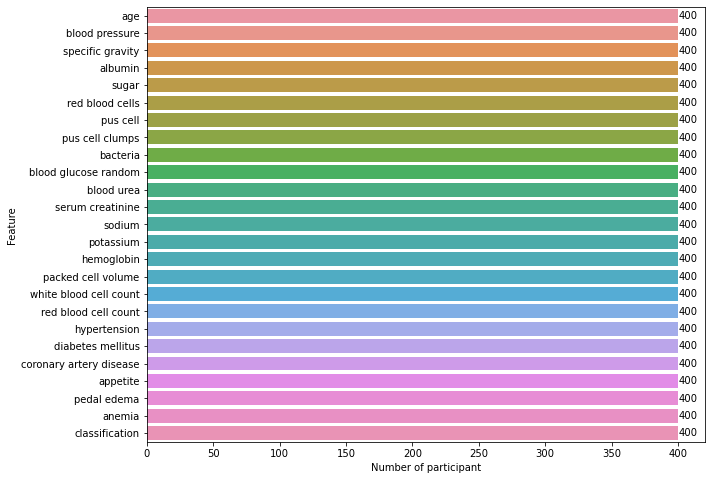

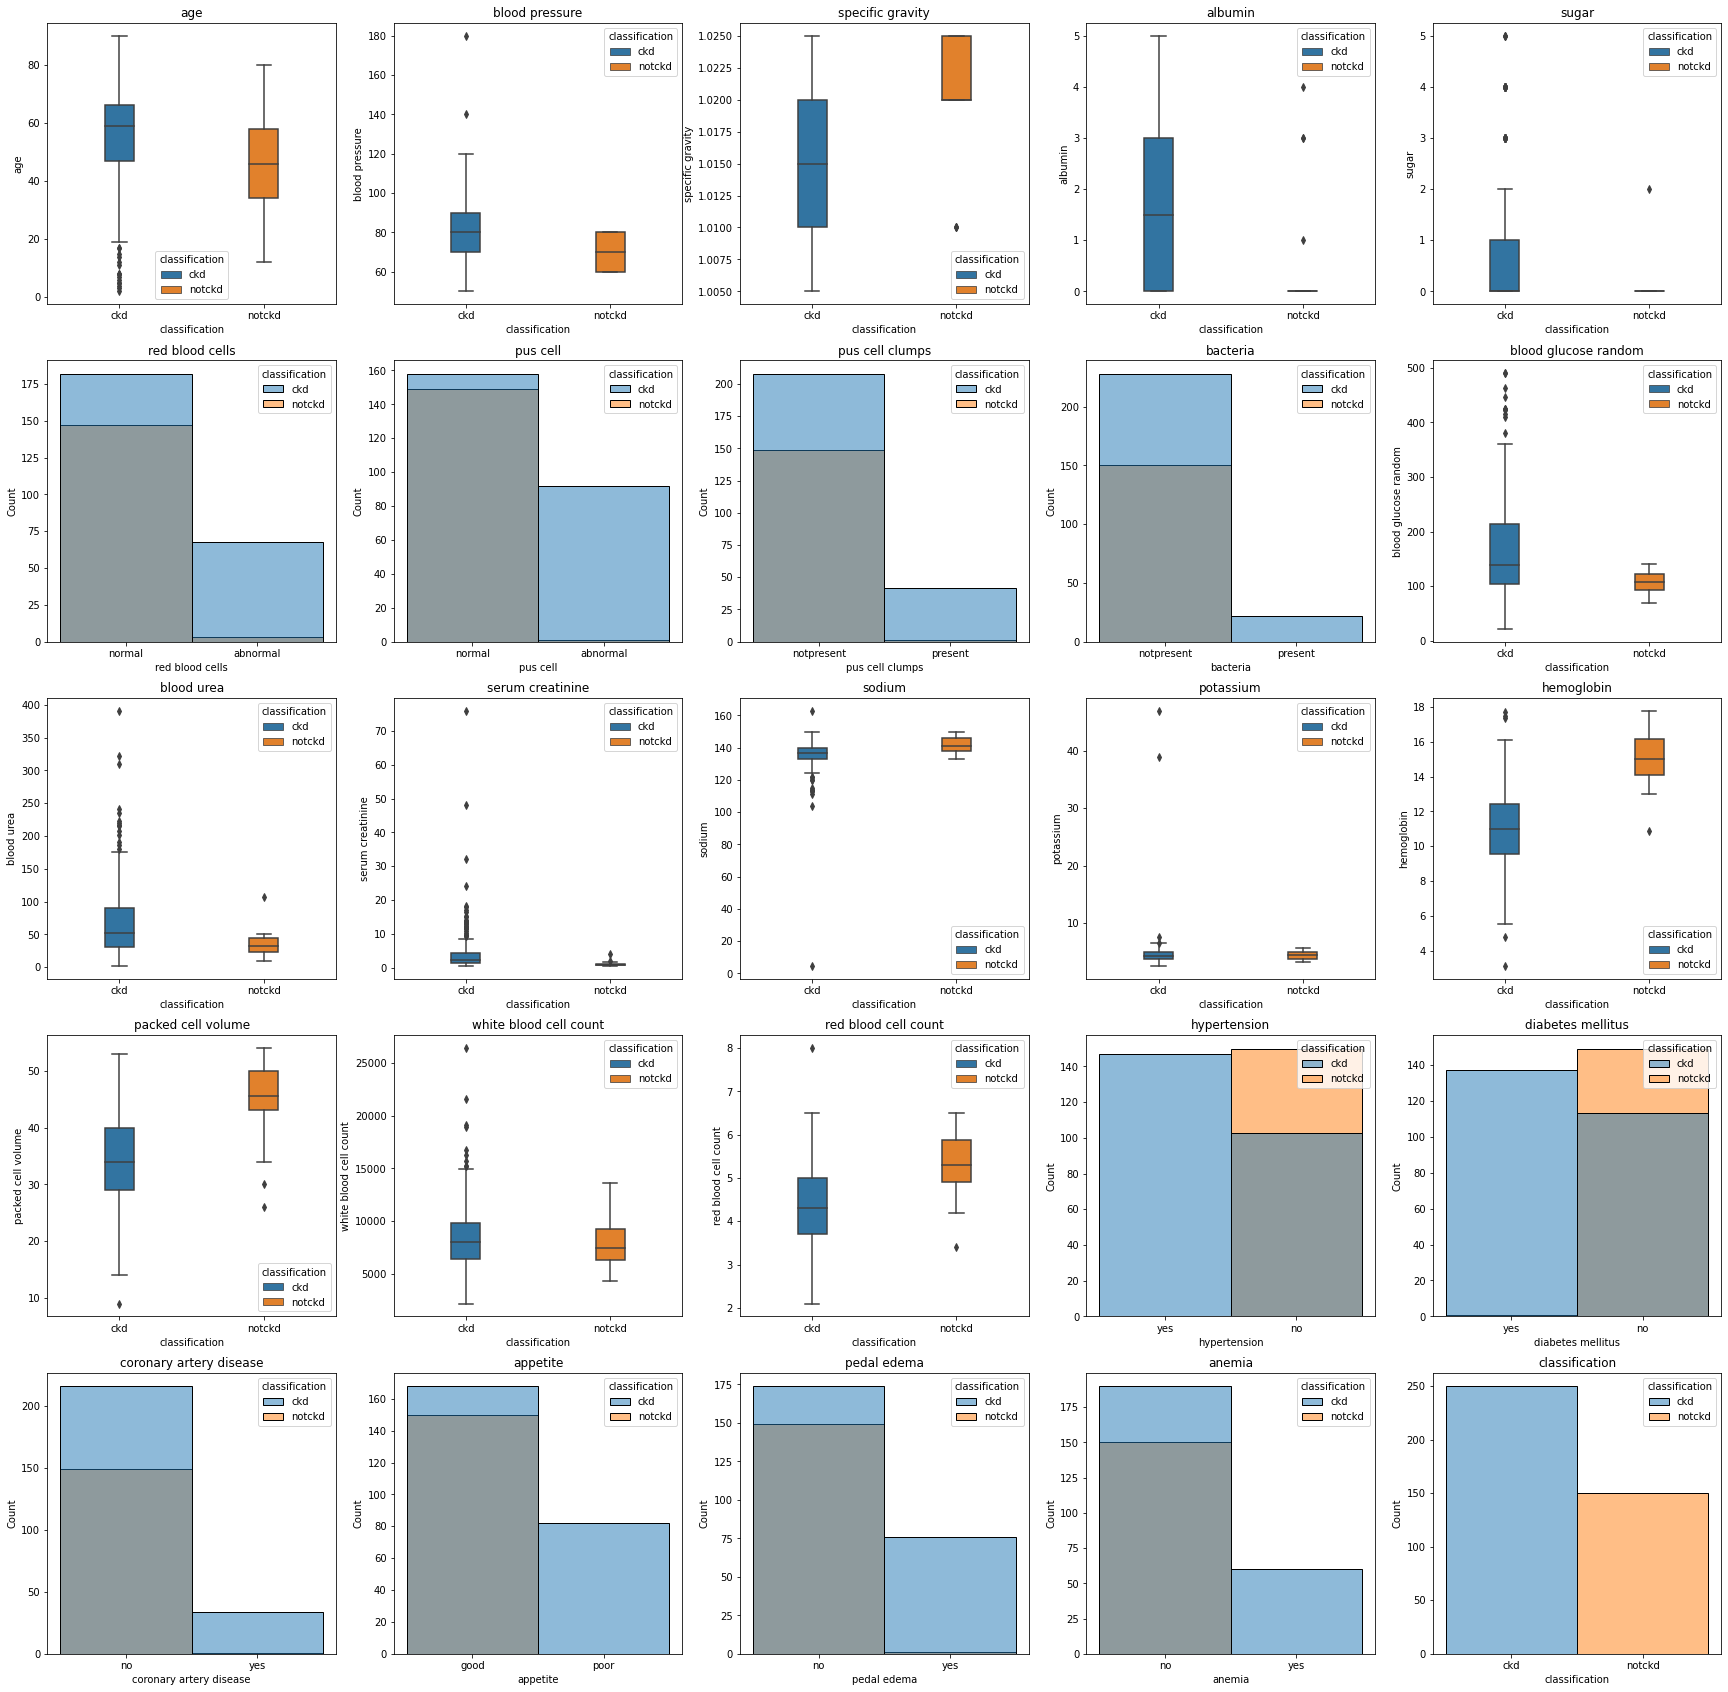

In [9]:
# Verify data frame don't have unrecognized values
nan_value = ckd_eda_df.isnull().sum()
print(nan_value)
plot_count_by_feature(ckd_eda_df)
print("Plot each feature by classification:")
plot_class_by_all(ckd_eda_df, n_plot_columns, n_plot_rows)

Now, we can verify that there is some numeric outline data. For example “serum creatinine” (main value to be observed for CKD), “sodium”, "potassium" and etc. Hence, we have to analyze what we have to do. In some cases we have to leave, in others we have to manage carefully (example remove or change).

Text(0.5, 0.98, 'Chronic Kidney Disease - data frame with EDA\nCKD classification, Serum creatinine, Sodium, Potassium')

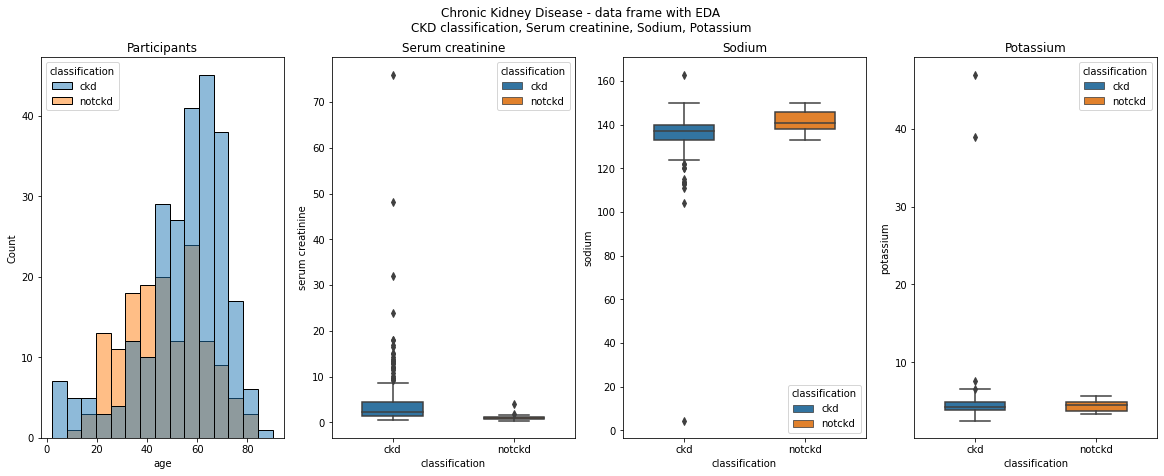

In [10]:
fig, axs = plt.subplots(1,4,figsize=(20, 7))
axs[0].set_title('Participants')
sns.histplot(data=ckd_eda_df, x='age', hue="classification", ax=axs[0])
axs[1].set_title('Serum creatinine')
sns.boxplot(x='classification',y='serum creatinine', hue = 'classification', data=ckd_eda_df, width=0.5, dodge=False, ax=axs[1])
axs[2].set_title('Sodium')
sns.boxplot(x='classification',y='sodium', hue = 'classification', data=ckd_eda_df, width=0.5, dodge=False, ax=axs[2])
axs[3].set_title('Potassium')
sns.boxplot(x='classification',y='potassium', hue = 'classification', data=ckd_eda_df, width=0.5, dodge=False, ax=axs[3])

fig.suptitle("Chronic Kidney Disease - data frame with EDA\nCKD classification, Serum creatinine, Sodium, Potassium")

Quartile analysis to clean data

In [10]:
# Value of quartils
Q1_sc  = ckd_eda_df['serum creatinine'].quantile(0.25)
Q3_sc  = ckd_eda_df['serum creatinine'].quantile(0.75)
IQR_sc = Q3_sc - Q1_sc
print(f"SERUM CREATININE")
print(f"Q1_sc:{Q1_sc}\t Q3_sc:{Q3_sc}\t IQR_sc:{IQR_sc}")

Q1_sod  = ckd_eda_df['sodium'].quantile(0.25)
Q3_sod  = ckd_eda_df['sodium'].quantile(0.75)
IQR_sod = Q3_sod - Q1_sod
print(f"SODIUM:")
print(f"Q1_sod:{Q1_sod}\t Q3_sod:{Q3_sod}\t IQR_sod:{IQR_sod}")

Q1_pot  = ckd_eda_df['potassium'].quantile(0.25)
Q3_pot  = ckd_eda_df['potassium'].quantile(0.75)
IQR_pot = Q3_pot - Q1_pot
print(f"POTASSIUM:")
print(f"Q1_pot:{Q1_pot}\t Q3_pot:{Q3_pot}\t IQR_pot:{IQR_pot}")

SERUM CREATININE
Q1_sc:0.9	 Q3_sc:2.8	 IQR_sc:1.9
SODIUM:
Q1_sod:135.0	 Q3_sod:142.0	 IQR_sod:7.0
POTASSIUM:
Q1_pot:3.8	 Q3_pot:4.9	 IQR_pot:1.1000000000000005


In [11]:
# Clean outlines 
ckd_eda_df = ckd_eda_df[ckd_eda_df['serum creatinine']> (Q1_sc - 1.5*IQR_sc)]
ckd_eda_df = ckd_eda_df[ckd_eda_df['serum creatinine']< (Q3_sc + 1.5*IQR_sc)]

ckd_eda_df = ckd_eda_df[ckd_eda_df['sodium']> (Q1_sod - 1.5*IQR_sod)]
ckd_eda_df = ckd_eda_df[ckd_eda_df['sodium']< (Q3_sod + 1.5*IQR_sod)]

ckd_eda_df = ckd_eda_df[ckd_eda_df['potassium']> (Q1_pot - 1.5*IQR_pot)]
ckd_eda_df = ckd_eda_df[ckd_eda_df['potassium']< (Q3_pot + 1.5*IQR_pot)]

Text(0.5, 0.98, 'Chronic Kidney Disease CKD classification, Serum creatinine, Sodium without outlines (1st cleaned)')

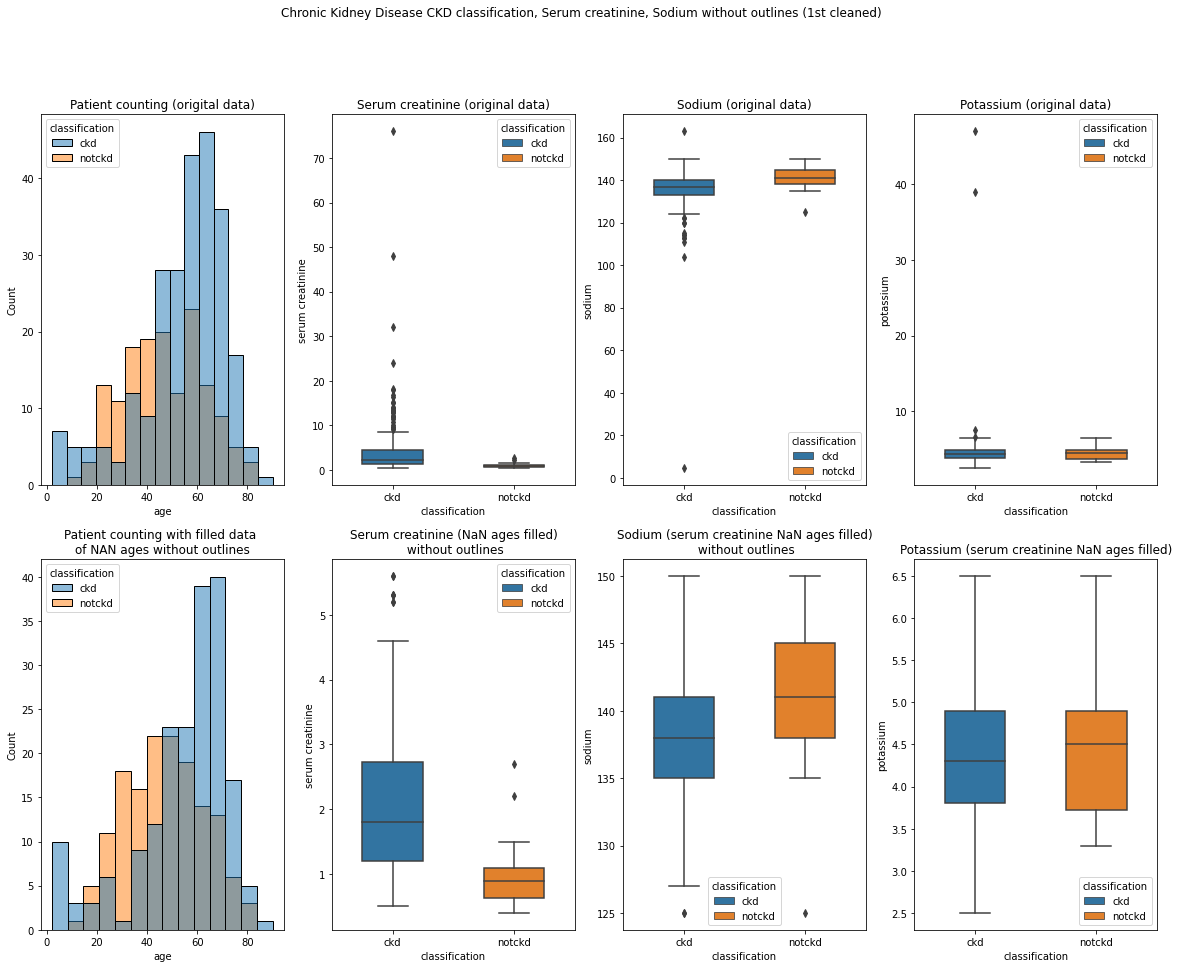

In [12]:
# Verify outline data 
fig, axs = plt.subplots(2,4,figsize=(20, 15))

axs[0,0].set_title('Patient counting (origital data)')
sns.histplot(data=ckd_df, x='age', hue="classification", ax=axs[0,0])
axs[0,1].set_title('Serum creatinine (original data)')
sns.boxplot(x='classification',y='serum creatinine', hue = 'classification', data=ckd_df, width=0.5, dodge=False, ax=axs[0,1])
axs[0,2].set_title('Sodium (original data)')
sns.boxplot(x='classification',y='sodium', hue = 'classification', data=ckd_df, width=0.5, dodge=False, ax=axs[0,2])
axs[0,3].set_title('Potassium (original data)')
sns.boxplot(x='classification',y='potassium', hue = 'classification', data=ckd_df, width=0.5, dodge=False, ax=axs[0,3])

axs[1,0].set_title('Patient counting with filled data \nof NAN ages without outlines')
sns.histplot(data=ckd_eda_df, x='age', hue="classification", ax=axs[1,0])
axs[1,1].set_title('Serum creatinine (NaN ages filled)\n without outlines')
sns.boxplot(data=ckd_eda_df, x='classification',y='serum creatinine', hue = 'classification', width=0.5, dodge=False, ax=axs[1,1])
axs[1,2].set_title('Sodium (serum creatinine NaN ages filled)\n without outlines')
sns.boxplot(x='classification',y='sodium', hue = 'classification', data=ckd_eda_df, width=0.5, dodge=False, ax=axs[1,2])
axs[1,3].set_title('Potassium (serum creatinine NaN ages filled)')
sns.boxplot(x='classification',y='potassium', hue = 'classification', data=ckd_eda_df, width=0.5, dodge=False, ax=axs[1,3])

fig.suptitle('Chronic Kidney Disease CKD classification, Serum creatinine, Sodium without outlines (1st cleaned)')

In [13]:
# Fix potassium outlines
ckd_eda_df = ckd_eda_df[ckd_eda_df['potassium']> (Q1_pot - 1.5*IQR_pot)]
ckd_eda_df = ckd_eda_df[ckd_eda_df['potassium']< (Q3_pot + 1.2*IQR_pot)]

Q1_pot  = ckd_eda_df['potassium'].quantile(0.25)
Q3_pot  = ckd_eda_df['potassium'].quantile(0.75)
IQR_pot = Q3_pot - Q1_pot
print(f"POTASSIUM:")
print(f"Q1_pot:{Q1_pot}\t Q3_pot:{Q3_pot}\t IQR_pot:{IQR_pot}")


# Fix serum creatinine value of notckd
Q1_notckd_sc  = ckd_eda_df[ckd_eda_df['classification']=='notckd']['serum creatinine'].quantile(0.25)
Q3_notckd_sc  = ckd_eda_df[ckd_eda_df['classification']=='notckd']['serum creatinine'].quantile(0.75)
IQR_notckd_sc = Q3_notckd_sc - Q1_notckd_sc

notckd_df = ckd_eda_df[ckd_eda_df['classification']=='notckd']
fix_notckd_index = notckd_df[notckd_df['serum creatinine'] > (Q3_notckd_sc + 1.5*IQR_notckd_sc)].index.tolist()
ckd_eda_df['serum creatinine'].loc[fix_notckd_index] = Q3_notckd_sc + 1.5*IQR_notckd_sc
if len(fix_notckd_index)>1:
    print(f"There are {len(fix_notckd_index)} with suspicious value. They are #{fix_notckd_index} participants.")
elif len(fix_notckd_index)==1:
    print(f"There is 1 with suspicious value. It is the #{fix_notckd_index} participant.")





POTASSIUM:
Q1_pot:3.8	 Q3_pot:4.9	 IQR_pot:1.1000000000000005
There are 2 with suspicious value. They are #[312, 334] participants.


Text(0.5, 0.98, 'Chronic Kidney Disease CKD classification, Serum creatinine, Sodium without outlines (2nd cleaned)')

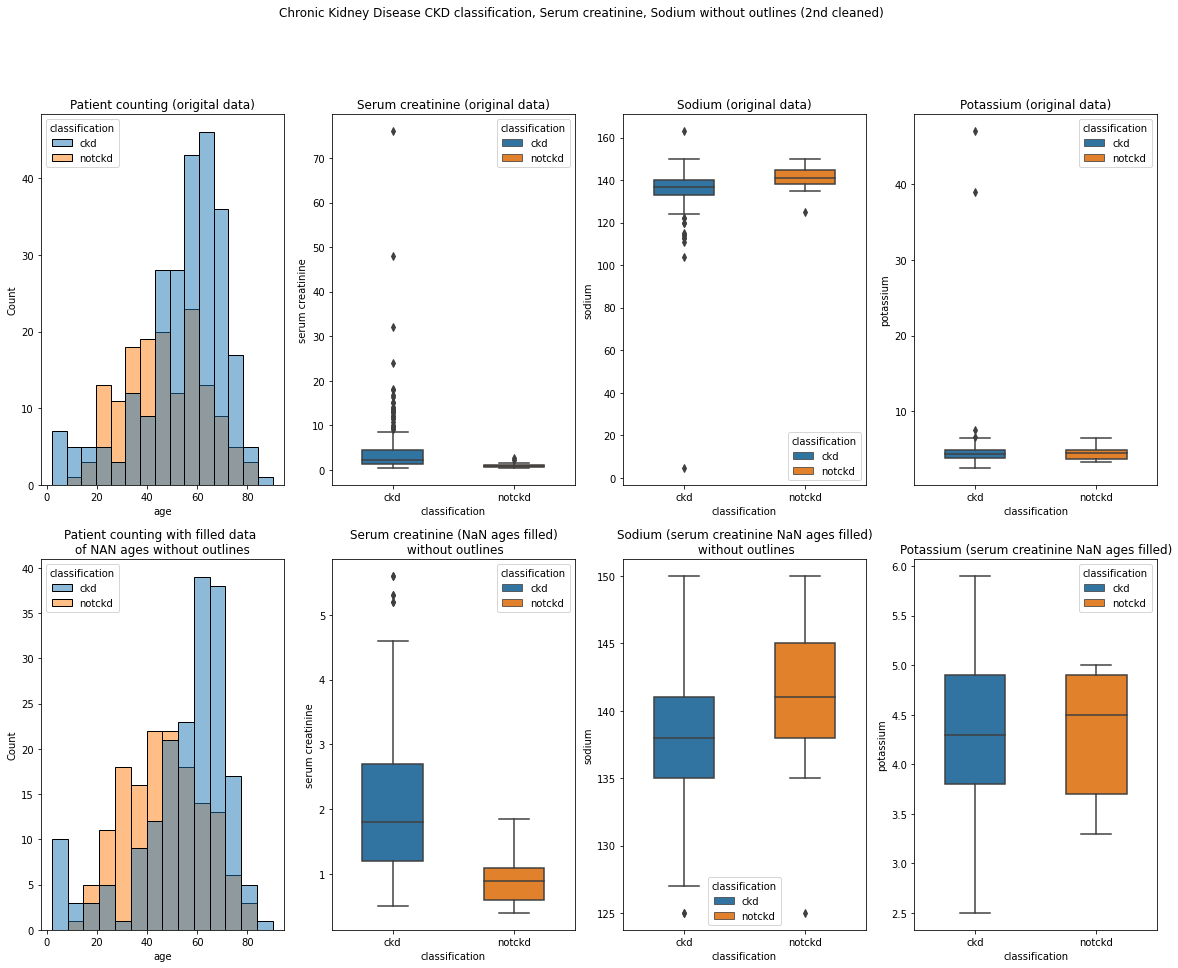

In [14]:
# Verify (2nd) outline data 
fig, axs = plt.subplots(2,4,figsize=(20, 15))

axs[0,0].set_title('Patient counting (origital data)')
sns.histplot(data=ckd_df, x='age', hue="classification", ax=axs[0,0])
axs[0,1].set_title('Serum creatinine (original data)')
sns.boxplot(x='classification',y='serum creatinine', hue = 'classification', data=ckd_df, width=0.5, dodge=False, ax=axs[0,1])
axs[0,2].set_title('Sodium (original data)')
sns.boxplot(x='classification',y='sodium', hue = 'classification', data=ckd_df, width=0.5, dodge=False, ax=axs[0,2])
axs[0,3].set_title('Potassium (original data)')
sns.boxplot(x='classification',y='potassium', hue = 'classification', data=ckd_df, width=0.5, dodge=False, ax=axs[0,3])

axs[1,0].set_title('Patient counting with filled data \nof NAN ages without outlines')
sns.histplot(data=ckd_eda_df, x='age', hue="classification", ax=axs[1,0])
axs[1,1].set_title('Serum creatinine (NaN ages filled)\n without outlines')
sns.boxplot(data=ckd_eda_df, x='classification',y='serum creatinine', hue = 'classification', width=0.5, dodge=False, ax=axs[1,1])
axs[1,2].set_title('Sodium (serum creatinine NaN ages filled)\n without outlines')
sns.boxplot(x='classification',y='sodium', hue = 'classification', data=ckd_eda_df, width=0.5, dodge=False, ax=axs[1,2])
axs[1,3].set_title('Potassium (serum creatinine NaN ages filled)')
sns.boxplot(x='classification',y='potassium', hue = 'classification', data=ckd_eda_df, width=0.5, dodge=False, ax=axs[1,3])

fig.suptitle('Chronic Kidney Disease CKD classification, Serum creatinine, Sodium without outlines (2nd cleaned)')

Watching these figures, we have to take into account that it loses data when we clean it.

In [15]:
# Resulting values of quartils
print("Resulting values of quartils")
Q1_sc  = ckd_eda_df['serum creatinine'].quantile(0.25)
Q3_sc  = ckd_eda_df['serum creatinine'].quantile(0.75)
IQR_sc = Q3_sc - Q1_sc
print(f"SERUM CREATININE")
print(f"Q1_sc:{Q1_sc}\t Q3_sc:{Q3_sc}\t IQR_sc:{IQR_sc}")
print(f"Lower sc inliner: {Q1_sc - 1.5*IQR_sc} \nUpper sc inliner: {Q3_sc + 1.5*IQR_sc}\n")

Q1_sod  = ckd_eda_df['sodium'].quantile(0.25)
Q3_sod  = ckd_eda_df['sodium'].quantile(0.75)
IQR_sod = Q3_sod - Q1_sod
print(f"SODIUM:")
print(f"Q1_sod:{Q1_sod}\t Q3_sod:{Q3_sod}\t IQR_sod:{IQR_sod}")
print(f"Lower sod inliner: {Q1_sod - 1.5*IQR_sod} \nUpper sod inliner: {Q3_sod + 1.5*IQR_sod}\n")

Q1_pot  = ckd_eda_df['potassium'].quantile(0.25)
Q3_pot  = ckd_eda_df['potassium'].quantile(0.75)
IQR_pot = Q3_pot - Q1_pot
print(f"POTASSIUM:")
print(f"Q1_pot:{Q1_pot}\t Q3_pot:{Q3_pot}\t IQR_pot:{IQR_pot}")
print(f"Lower sod inliner: {Q1_pot - 1.5*IQR_pot} \nUpper sod inliner: {Q3_pot + 1.2*IQR_pot}\n")

Resulting values of quartils
SERUM CREATININE
Q1_sc:0.875	 Q3_sc:1.9	 IQR_sc:1.025
Lower sc inliner: -0.6624999999999999 
Upper sc inliner: 3.4375

SODIUM:
Q1_sod:135.0	 Q3_sod:142.0	 IQR_sod:7.0
Lower sod inliner: 124.5 
Upper sod inliner: 152.5

POTASSIUM:
Q1_pot:3.8	 Q3_pot:4.9	 IQR_pot:1.1000000000000005
Lower sod inliner: 2.149999999999999 
Upper sod inliner: 6.220000000000001



Now, we are goint to plot regression of "Serum creatinine" by each numeric data.

In [16]:
def regplot_creatinine_by_feature(df, x, ax):
    for i, value in enumerate(df["classification"].unique()):
        ax = sns.regplot(x=x, y="serum creatinine", 
                            ax=ax,color=colors[i],marker=markers[i],
                            data=df[df.classification == value],label=value)
        ax.legend(loc='best') 
    ax.set_title("Creatinine by "+x)

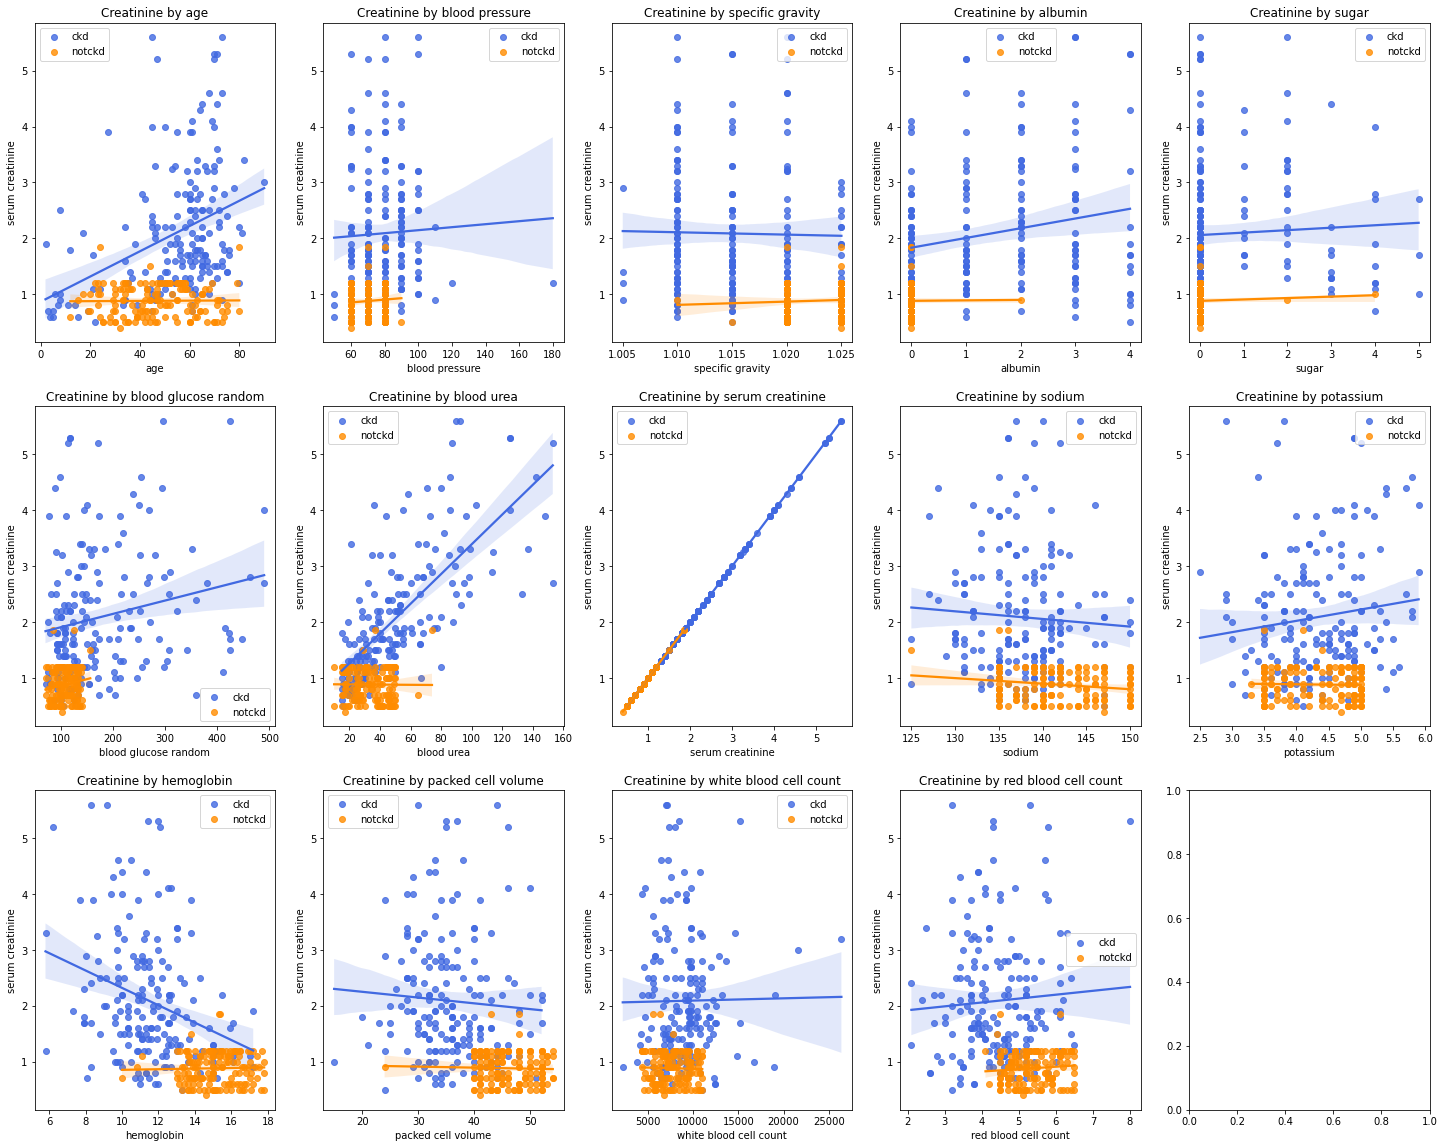

In [17]:
ckd_eda_float_df = ckd_eda_df.select_dtypes("float64")

ckd_eda_float_features = ckd_eda_float_df.columns
n_float_feature = len(ckd_eda_float_features)

n_plot_columns = 5
n_plot_rows    = math.ceil(n_float_feature/n_plot_columns)

fig, axs = plt.subplots(n_plot_rows,n_plot_columns,figsize=(25, 20),facecolor = 'white')
colors = ['royalblue', 'darkorange']
markers = ['o', 'o']

i_plot_rows    = 0
i_plot_columns = 0

for feature in ckd_eda_float_features:
    regplot_creatinine_by_feature(ckd_eda_df, feature, axs[i_plot_rows, i_plot_columns])
    if i_plot_columns < n_plot_columns-1:
        i_plot_columns += 1
    elif i_plot_rows < n_plot_rows-1:
        i_plot_rows   += 1
        i_plot_columns = 0


It is clear that who is CKD has high Serum creatinine.

Now, we are going to analysis relation "Serum creatinine" and "Sodium" who has "anemia" and "hypertension".

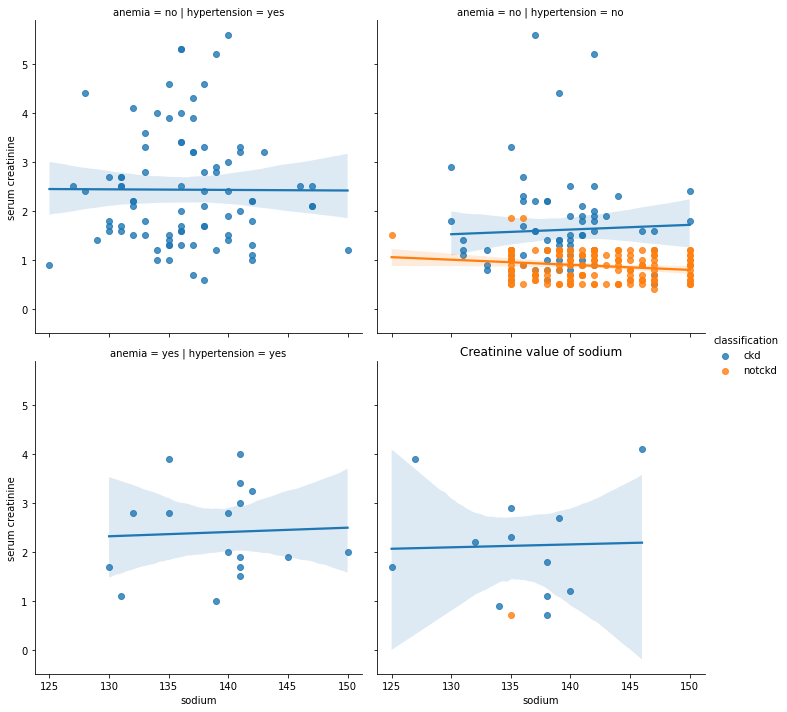

In [18]:
sns.lmplot(x="sodium", y="serum creatinine", hue="classification", col="hypertension", row="anemia", data=ckd_eda_df)
ax = plt.gca()
ax.set_title("Creatinine value of sodium")
plt.show()

It is possible understand that people who doesn't have anemia and hypertension are not CKD.

In [14]:
ckd_eda_df[ckd_eda_df['hypertension'].isin(['yes'])].values

array([[48.0, 80.0, 1.02, ..., 'no', 'no', 'ckd'],
       [48.0, 70.0, 1.005, ..., 'yes', 'yes', 'ckd'],
       [60.0, 90.0, 1.015, ..., 'yes', 'no', 'ckd'],
       ...,
       [48.0, 110.0, 1.015, ..., 'no', 'yes', 'ckd'],
       [59.0, 70.0, 1.01, ..., 'no', 'no', 'ckd'],
       [56.0, 90.0, 1.01, ..., 'yes', 'yes', 'ckd']], dtype=object)

In [25]:
test = pd.melt(ckd_eda_df, id_vars=['blood urea'], value_vars=['classification', 'serum creatinine']).sort_values('blood urea')
test.drop_duplicates('blood urea')

,blood urea,variable,value
573,1.5,serum creatinine,7.3
250,10.0,classification,notckd
616,15.0,serum creatinine,4.6
676,16.0,serum creatinine,1.6
307,17.0,classification,notckd
...,...,...,...
153,235.0,classification,ckd
238,241.0,classification,ckd
649,309.0,serum creatinine,13.3
145,322.0,classification,ckd


In [34]:
test2 = pd.melt(ckd_eda_df.sort_values('serum creatinine'), id_vars=['classification','blood urea'], value_vars=['serum creatinine']).sort_values('blood urea')
test2.sort_values('value')

,classification,blood urea,variable,value
0,notckd,17.0,serum creatinine,0.4
2,notckd,40.0,serum creatinine,0.5
10,notckd,40.0,serum creatinine,0.5
9,notckd,27.0,serum creatinine,0.5
8,notckd,45.0,serum creatinine,0.5
...,...,...,...,...
395,ckd,223.0,serum creatinine,18.1
396,ckd,54.0,serum creatinine,24.0
397,ckd,391.0,serum creatinine,32.0
398,ckd,26.0,serum creatinine,48.1


In [36]:
ckd_eda_df.groupby(['classification']).first()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
classification,,,,,,,,,,,,,,,,,,,,,
ckd,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
notckd,40.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,15.0,48.0,10400.0,4.5,no,no,no,good,no,no
